In [1]:
import mne
import numpy as np
import os

# Define the path to the dataset and the output directory
gdf_path = '/home/jovyan/BCICIV_2a_gdf/A01T.gdf'
output_dir = '/home/jovyan/BCICIV_2a_gdf/sub1_segment'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Step 1: Load the BCI-IV 2a dataset
raw = mne.io.read_raw_gdf(gdf_path, preload=True)

# Remove the last three channels (EOG-left, EOG-central, and EOG-right)
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

# Step 2: Extract epochs for each class using provided event IDs
event_id = {'769': 5, '770': 6, '771': 7, '772': 8}
events, _ = mne.events_from_annotations(raw, event_id=event_id)
tmin, tmax = 1.5, 6  # 4.5 seconds epochs starting at 1.5s

# Creating epochs for each class
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True)
data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)

# Standardize each channel
data = (data - data.mean(axis=2, keepdims=True)) / data.std(axis=2, keepdims=True)

# Step 3: Save each epoch as a matrix of shape (22, 1125) in different subfolders
for i, epoch_data in enumerate(data):
    # Adjust labels to start from 0 by subtracting 7 from each label
    label = epochs.events[i, -1] - 5
    # Create subfolder if it doesn't exist
    class_output_dir = os.path.join(output_dir, f'class_{label}')
    os.makedirs(class_output_dir, exist_ok=True)
    file_path = os.path.join(class_output_dir, f'sub_epoch_{i+1}.npy')
    np.save(file_path, epoch_data)

print(f'Saved {len(data)} epochs to {output_dir}')


Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved 287 epochs to /home/jovyan/BCICIV_2a_gdf/sub1_segment


/tmp/ipykernel_268/1463829841.py:25: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


In [51]:
import mne
import numpy as np
import os

# Define the path to the dataset and the output directory
gdf_dir = '/home/jovyan/BCICIV_2a_gdf'
output_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_finalvol2'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List of subject files
subjects = ['A01T.gdf', 'A02T.gdf', 'A03T.gdf', 'A04T.gdf', 'A05T.gdf', 'A06T.gdf', 'A07T.gdf', 'A08T.gdf', 'A09T.gdf']

# Event IDs for the classes
event_id = {'769': 7, '770': 8, '771': 9, '772': 10}
tmin, tmax = 1.5, 6  # 4.5 seconds epochs starting at 1.5s

for subject in subjects:
    # Define the path to the subject's GDF file
    gdf_path = os.path.join(gdf_dir, subject)
    
    # Load the BCI-IV 2a dataset
    raw = mne.io.read_raw_gdf(gdf_path, preload=True)

    # Remove the last three channels (EOG-left, EOG-central, and EOG-right)
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

    # Extract epochs for each class using provided event IDs
    events, _ = mne.events_from_annotations(raw, event_id=event_id)

    # Creating epochs for each class
    epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True)
    data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)

    # Standardize each channel
    data = (data - data.mean(axis=2, keepdims=True)) / data.std(axis=2, keepdims=True)

    # Step 3: Save each epoch as a matrix of shape (22, 1125) in different subfolders
    for i, epoch_data in enumerate(data):
        # Adjust labels to start from 0 by subtracting 5 from each label
        label = epochs.events[i, -1] - 5
        # Create subfolder if it doesn't exist
        class_output_dir = os.path.join(output_dir, f'class_{label}')
        os.makedirs(class_output_dir, exist_ok=True)
        file_path = os.path.join(class_output_dir, f'{subject[:-4]}_epoch_{i+1}.npy')
        np.save(file_path, epoch_data)

    print(f'Saved {len(data)} epochs for {subject} to {output_dir}')

print("Processing complete for all subjects.")


Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved 287 epochs for A01T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/tmp/ipykernel_1744806/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved 287 epochs for A02T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/tmp/ipykernel_1744806/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved 287 epochs for A03T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/tmp/ipykernel_1744806/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved 287 epochs for A04T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/tmp/ipykernel_1744806/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved 287 epochs for A05T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/tmp/ipykernel_1744806/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved 287 epochs for A06T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/tmp/ipykernel_1744806/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved 287 epochs for A07T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/tmp/ipykernel_1744806/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved 287 epochs for A08T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/tmp/ipykernel_1744806/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)
/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 1126 original time points ...
1 bad epochs dropped
Saved 287 epochs for A09T.gdf to /home/jovyan/BCICIV_2a_gdf/epoch_finalvol2
Processing complete for all subjects.


/tmp/ipykernel_1744806/3491532763.py:34: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()  # shape is (n_epochs, n_channels, n_times)


In [2]:
import os
import numpy as np
from scipy.signal import stft
import matplotlib.pyplot as plt

# Define paths
data_dir = '/home/jovyan/BCICIV_2a_gdf/sub1_segment'
output_dir = '/home/jovyan/BCICIV_2a_gdf/stft_sub1'

# Create output directories for each class
class_labels = [0, 1, 2, 3]
for label in class_labels:
    class_dir = os.path.join(output_dir, f'class_{label}')
    os.makedirs(class_dir, exist_ok=True)

# Iterate through each class subfolder
for label in class_labels:
    class_dir = os.path.join(data_dir, f'class_{label}')
    stft_class_dir = os.path.join(output_dir, f'class_{label}')
    for subdir, _, files in os.walk(class_dir):
        for file in files:
            if file.endswith('.npy'):
                # Load EEG data
                file_path = os.path.join(subdir, file)
                eeg_data = np.load(file_path)
                
                # Apply STFT for each channel and store results
                stft_results = []
                for channel_data in eeg_data:
                    f, t, Zxx = stft(channel_data, fs=250, nperseg=128)  # Adjust parameters as needed
                    stft_results.append(np.abs(Zxx))
                
                # Convert list of arrays to a single matrix
                stft_results = np.array(stft_results)  # Shape: (num_channels, num_freq_bins, num_time_points)
                combined_stft = np.mean(stft_results, axis=0)  # Combine channels, or you can use another method
                
                # Construct output path
                subdir_name = os.path.relpath(subdir, class_dir)
                stft_subdir = os.path.join(stft_class_dir, subdir_name)
                os.makedirs(stft_subdir, exist_ok=True)
                
                # Plot and save the combined STFT results without axes and color bar
                plt.figure(figsize=(10, 6))
                plt.pcolormesh(t, f, combined_stft, shading='gouraud')
                plt.axis('off')  # Turn off the axis
                
                # Save the plot
                stft_plot_path = os.path.join(stft_subdir, file.replace('.npy', '_stft.png'))
                plt.savefig(stft_plot_path, bbox_inches='tight', pad_inches=0)
                plt.close()

print('STFT plots saved successfully.')


STFT plots saved successfully.


In [8]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the path to the processed data
processed_data_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_final1'

# Load the data
def load_data(data_dir):
    data = []
    labels = []
    for label in range(4):
        class_dir = os.path.join(data_dir, f'class_{label}')
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if os.path.isfile(file_path) and file_path.endswith('.npy'):
                epoch_data = np.load(file_path)
                data.append(epoch_data)
                labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Load the dataset
data, labels = load_data(processed_data_dir)

# Split into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Prepare the data for training
train_data = train_data[..., np.newaxis]
test_data = test_data[..., np.newaxis]

# Check the input shape after adding a new axis
input_shape = train_data.shape[1:]
print(f"Input shape: {input_shape}")

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(22, 1126, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Print the model summary to understand the output shape at each layer
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 20
batch_size = 32
history = model.fit(train_data, train_labels, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Test Accuracy (calculated): {accuracy * 100:.2f}%')


Input shape: (22, 1126, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 20, 1124, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 562, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 560, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 280, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 71680)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     9,175,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,194,500 (35.07 MB)

 Trainable params: 9,194,500 (35.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.2832 - loss: 6.7047 - val_accuracy: 0.3261 - val_loss: 2.6364
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.3229 - loss: 1.9348 - val_accuracy: 0.2391 - val_loss: 1.5013
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.2841 - loss: 1.3629 - val_accuracy: 0.2391 - val_loss: 1.4167
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.4120 - loss: 1.3287 - val_accuracy: 0.1522 - val_loss: 1.4084
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.4807 - loss: 1.2443 - val_accuracy: 0.2826 - val_loss: 1.3994
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.6746 - loss: 1.0785 - val_accuracy: 0.2391 - val_loss: 1.6036
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.6922 - loss: 0.8605 - val_accuracy: 0.1957 - val_loss: 1.7020
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.7387 - loss: 0.6473 - val_accuracy: 0.2174 - val_loss:

In [32]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess data
def load_data(data_dir):
    data = []
    labels = []
    for label in range(4):
        class_dir = os.path.join(data_dir, f'class_{label}')
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if os.path.isfile(file_path) and file_path.endswith('.npy'):
                epoch_data = np.load(file_path)
                data.append(epoch_data)
                labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Define the path to the processed data
processed_data_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_final1'
data, labels = load_data(processed_data_dir)

# Split data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)

# Define model hyperparameters
C = train_data.shape[1]  # Number of channels
T = train_data.shape[2]  # Number of samples
F1 = 16  # Number of temporal filters in EEGnet
F2 = 16  # Number of pointwise filters in EEGnet
D = 2  # Depth multiplier
KE = 32  # Kernel size in EEGnet first convolution
KT = 8  # Kernel size in TCN block
pe = 0.3  # Dropout rate in EEGnet
pt = 0.3  # Dropout rate in TCN block
FT = 8  # Filters in TCN block

# Define the model
def create_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # EEGNet Block
    x = tf.keras.layers.Conv2D(F1, (1, KE), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='C1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='BN1')(x)
    x = tf.keras.layers.DepthwiseConv2D((C, 1), depth_multiplier=D, padding='valid', depthwise_constraint=tf.keras.constraints.max_norm(1.), name='C2')(x)
    x = tf.keras.layers.BatchNormalization(name='BN2')(x)
    x = tf.keras.layers.ELU(name='A1')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P1')(x)
    x = tf.keras.layers.Dropout(pe, name='D1')(x)
    x = tf.keras.layers.SeparableConv2D(F2, (1, 16), padding='same', name='C3')(x)
    x = tf.keras.layers.BatchNormalization(name='B2')(x)
    x = tf.keras.layers.ELU(name='A2')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P2')(x)
    x = tf.keras.layers.Dropout(pe, name='D2')(x)

    # Temporal Convolutional Block
    tcn = tf.keras.layers.Conv2D(FT, (1, KT), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='TC')(x)
    tcn = tf.keras.layers.Dropout(pt)(tcn)
    tcn = tf.keras.layers.ELU()(tcn)

    # Concatenation
    x = tf.keras.layers.Concatenate(name='CON1')([x, tcn])

    # Fully Connected Layers
    fc1 = tf.keras.layers.Flatten(name='FC1')(x)
    fc2 = tf.keras.layers.Flatten(name='FC2')(x)
    x = tf.keras.layers.Concatenate(name='CON2')([fc1, fc2])
    x = tf.keras.layers.Dense(128, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_constraint=tf.keras.constraints.max_norm(0.25))(x)
    outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Initialize and compile the model
input_shape = (C, T, 1)
model = create_model(input_shape)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights_array))

# Train the model
num_epochs = 1000
batch_size = 32
history = model.fit(train_data, train_labels, epochs=num_epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[lr_scheduler, early_stopping],
                    class_weight=class_weights)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Test Accuracy (calculated): {accuracy * 100:.2f}%')

# Calculate Cohen's kappa score
kappa_score = cohen_kappa_score(test_labels, predicted_labels)
print(f"Cohen's κ-score: {kappa_score:.2f}")

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print the number of parameters
num_params = model.count_params()
print(f'Number of parameters: {num_params}')


Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.2398 - loss: 2.4512 - val_accuracy: 0.3043 - val_loss: 1.5865 - learning_rate: 1.0000e-04
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.3126 - loss: 1.5717 - val_accuracy: 0.2826 - val_loss: 1.5863 - learning_rate: 1.0000e-04
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.4354 - loss: 1.4864 - val_accuracy: 0.3043 - val_loss: 1.5860 - learning_rate: 1.0000e-04
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.4710 - loss: 1.4698 - val_accuracy: 0.3043 - val_loss: 1.5859 - learning_rate: 1.0000e-04
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.5500 - loss: 1.4202 - val_accuracy: 0.2826 - val_loss: 1.5859 - learning_rate: 1.0000e-04
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.5266 - loss: 1.4104 - val_accuracy: 0.2826 - val_loss: 1.5859 - learning_rate: 1.0000e-04
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 

In [44]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess data
def load_data(data_dir):
    data = []
    labels = []
    for label in range(4):
        class_dir = os.path.join(data_dir, f'class_{label}')
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if os.path.isfile(file_path) and file_path.endswith('.npy'):
                epoch_data = np.load(file_path)
                data.append(epoch_data)
                labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Define the path to the processed data
processed_data_dir = '/home/jovyan/BCICIV_2a_gdf/processed_epoch_final1'
data, labels = load_data(processed_data_dir)

# Split data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)

# Data Augmentation (e.g., time-shifting)
def augment_data(data):
    augmented_data = []
    for epoch in data:
        shift = np.random.randint(epoch.shape[1] // 10)
        if np.random.rand() > 0.5:
            epoch = np.roll(epoch, shift, axis=1)
        else:
            epoch = np.roll(epoch, -shift, axis=1)
        augmented_data.append(epoch)
    return np.array(augmented_data)

train_data = augment_data(train_data)

# Define model hyperparameters
C = train_data.shape[1]  # Number of channels
T = train_data.shape[2]  # Number of samples
F1 = 32  # Number of temporal filters in EEGnet
F2 = 64  # Number of pointwise filters in EEGnet
D = 4  # Depth multiplier
KE = 64  # Kernel size in EEGnet first convolution
KT = 32  # Kernel size in TCN block
pe = 0.4  # Dropout rate in EEGnet
pt = 0.4  # Dropout rate in TCN block
FT = 32  # Filters in TCN block

# Define the model
def create_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # EEGNet Block
    x = tf.keras.layers.Conv2D(F1, (1, KE), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='C1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='BN1')(x)
    x = tf.keras.layers.DepthwiseConv2D((C, 1), depth_multiplier=D, padding='valid', depthwise_constraint=tf.keras.constraints.max_norm(1.), name='C2')(x)
    x = tf.keras.layers.BatchNormalization(name='BN2')(x)
    x = tf.keras.layers.ELU(name='A1')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P1')(x)
    x = tf.keras.layers.Dropout(pe, name='D1')(x)
    x = tf.keras.layers.SeparableConv2D(F2, (1, 16), padding='same', name='C3')(x)
    x = tf.keras.layers.BatchNormalization(name='B2')(x)
    x = tf.keras.layers.ELU(name='A2')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P2')(x)
    x = tf.keras.layers.Dropout(pe, name='D2')(x)

    # Temporal Convolutional Block
    tcn = tf.keras.layers.Conv2D(FT, (1, KT), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='TC')(x)
    tcn = tf.keras.layers.Dropout(pt)(tcn)
    tcn = tf.keras.layers.ELU()(tcn)

    # Concatenation
    x = tf.keras.layers.Concatenate(name='CON1')([x, tcn])

    # Fully Connected Layers
    fc1 = tf.keras.layers.Flatten(name='FC1')(x)
    fc2 = tf.keras.layers.Flatten(name='FC2')(x)
    x = tf.keras.layers.Concatenate(name='CON2')([fc1, fc2])
    x = tf.keras.layers.Dense(256, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_constraint=tf.keras.constraints.max_norm(0.25))(x)
    x = tf.keras.layers.Dropout(0.5)(x)  # Add another dropout layer
    outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Initialize and compile the model
input_shape = (C, T, 1)
model = create_model(input_shape)
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights_array))

# Train the model
num_epochs = 200
batch_size = 32
history = model.fit(train_data, train_labels, epochs=num_epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[lr_scheduler, early_stopping],
                    class_weight=class_weights)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Test Accuracy (calculated): {accuracy * 100:.2f}%')

# Calculate Cohen's kappa score
kappa_score = cohen_kappa_score(test_labels, predicted_labels)
print(f"Cohen's κ-score: {kappa_score:.2f}")

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print the number of parameters
num_params = model.count_params()
print(f'Number of parameters: {num_params}')


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 501ms/step - accuracy: 0.2946 - loss: 3.4626 - val_accuracy: 0.2319 - val_loss: 1.9888 - learning_rate: 1.0000e-04
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 492ms/step - accuracy: 0.3749 - loss: 1.9157 - val_accuracy: 0.2174 - val_loss: 1.9843 - learning_rate: 1.0000e-04
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 475ms/step - accuracy: 0.4559 - loss: 1.8180 - val_accuracy: 0.2899 - val_loss: 1.9794 - learning_rate: 1.0000e-04
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - accuracy: 0.4739 - loss: 1.7657 - val_accuracy: 0.3043 - val_loss: 1.9743 - learning_rate: 1.0000e-04
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 471ms/step - accuracy: 0.4608 - loss: 1.7324 - val_accuracy: 0.3043 - val_loss: 1.9691 - learning_rate: 1.0000e-04
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 459ms/step - accuracy: 0.4786 - loss: 1.7047 - val_accuracy: 0.3043 - val_loss: 1.9637 - learning_rate: 1.0000e-04
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 460ms/step - accuracy: 0.5581 

In [47]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess data
def load_data(data_dir):
    data = []
    labels = []
    for label in range(4):
        class_dir = os.path.join(data_dir, f'class_{label}')
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if os.path.isfile(file_path) and file_path.endswith('.npy'):
                epoch_data = np.load(file_path)
                data.append(epoch_data)
                labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Define the path to the processed data
processed_data_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_finalvol1'
data, labels = load_data(processed_data_dir)

# Split data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)

# Data Augmentation (e.g., time-shifting)
def augment_data(data):
    augmented_data = []
    for epoch in data:
        shift = np.random.randint(epoch.shape[1] // 10)
        if np.random.rand() > 0.5:
            epoch = np.roll(epoch, shift, axis=1)
        else:
            epoch = np.roll(epoch, -shift, axis=1)
        augmented_data.append(epoch)
    return np.array(augmented_data)

train_data = augment_data(train_data)

# Define model hyperparameters
C = train_data.shape[1]  # Number of channels
T = train_data.shape[2]  # Number of samples
F1 = 32  # Number of temporal filters in EEGnet
F2 = 64  # Number of pointwise filters in EEGnet
D = 4  # Depth multiplier
KE = 64  # Kernel size in EEGnet first convolution
KT = 32  # Kernel size in TCN block
pe = 0.4  # Dropout rate in EEGnet
pt = 0.4  # Dropout rate in TCN block
FT = 32  # Filters in TCN block

# Define the model
def create_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # EEGNet Block
    x = tf.keras.layers.Conv2D(F1, (1, KE), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='C1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='BN1')(x)
    x = tf.keras.layers.DepthwiseConv2D((C, 1), depth_multiplier=D, padding='valid', depthwise_constraint=tf.keras.constraints.max_norm(1.), name='C2')(x)
    x = tf.keras.layers.BatchNormalization(name='BN2')(x)
    x = tf.keras.layers.ELU(name='A1')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P1')(x)
    x = tf.keras.layers.Dropout(pe, name='D1')(x)
    x = tf.keras.layers.SeparableConv2D(F2, (1, 16), padding='same', name='C3')(x)
    x = tf.keras.layers.BatchNormalization(name='B2')(x)
    x = tf.keras.layers.ELU(name='A2')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P2')(x)
    x = tf.keras.layers.Dropout(pe, name='D2')(x)

    # Temporal Convolutional Block
    tcn = tf.keras.layers.Conv2D(FT, (1, KT), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='TC')(x)
    tcn = tf.keras.layers.Dropout(pt)(tcn)
    tcn = tf.keras.layers.ELU()(tcn)

    # Concatenation
    x = tf.keras.layers.Concatenate(name='CON1')([x, tcn])

    # Fully Connected Layers
    fc1 = tf.keras.layers.Flatten(name='FC1')(x)
    fc2 = tf.keras.layers.Flatten(name='FC2')(x)
    x = tf.keras.layers.Concatenate(name='CON2')([fc1, fc2])
    x = tf.keras.layers.Dense(256, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_constraint=tf.keras.constraints.max_norm(0.25))(x)
    x = tf.keras.layers.Dropout(0.5)(x)  # Add another dropout layer
    outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Initialize and compile the model
input_shape = (C, T, 1)
model = create_model(input_shape)
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights_array))

# Train the model
num_epochs = 200
batch_size = 32
history = model.fit(train_data, train_labels, epochs=num_epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[lr_scheduler, early_stopping],
                    class_weight=class_weights)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Test Accuracy (calculated): {accuracy * 100:.2f}%')

# Calculate Cohen's kappa score
kappa_score = cohen_kappa_score(test_labels, predicted_labels)
print(f"Cohen's κ-score: {kappa_score:.2f}")

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print the number of parameters
num_params = model.count_params()
print(f'Number of parameters: {num_params}')


Epoch 1/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 29s 482ms/step - accuracy: 0.2561 - loss: 2.4605 - val_accuracy: 0.2198 - val_loss: 1.9659 - learning_rate: 1.0000e-04
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 487ms/step - accuracy: 0.3483 - loss: 1.9339 - val_accuracy: 0.2198 - val_loss: 1.9417 - learning_rate: 1.0000e-04
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 479ms/step - accuracy: 0.3465 - loss: 1.8755 - val_accuracy: 0.2198 - val_loss: 1.9180 - learning_rate: 1.0000e-04
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 481ms/step - accuracy: 0.3947 - loss: 1.8333 - val_accuracy: 0.2246 - val_loss: 1.8990 - learning_rate: 1.0000e-04
Epoch 5/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 473ms/step - accuracy: 0.3861 - loss: 1.8127 - val_accuracy: 0.2585 - val_loss: 1.8780 - learning_rate: 1.0000e-04
Epoch 6/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 26s 495ms/step - accuracy: 0.4061 - loss: 1.7614 - val_accuracy: 0.2802 - val_loss: 1.8578 - learning_rate: 1.0000e-04
Epoch 7/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 40s 478ms/ste

In [53]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess data
def load_data(data_dir):
    data = []
    labels = []
    for label in range(4):
        class_dir = os.path.join(data_dir, f'class_{label}')
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if os.path.isfile(file_path) and file_path.endswith('.npy'):
                epoch_data = np.load(file_path)
                data.append(epoch_data)
                labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Define the path to the processed data
processed_data_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_finalvol2'
data, labels = load_data(processed_data_dir)

# Split data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)

# Data Augmentation (e.g., time-shifting)
def augment_data(data):
    augmented_data = []
    for epoch in data:
        shift = np.random.randint(epoch.shape[1] // 10)
        if np.random.rand() > 0.5:
            epoch = np.roll(epoch, shift, axis=1)
        else:
            epoch = np.roll(epoch, -shift, axis=1)
        augmented_data.append(epoch)
    return np.array(augmented_data)

train_data = augment_data(train_data)

# Define model hyperparameters
C = train_data.shape[1]  # Number of channels
T = train_data.shape[2]  # Number of samples
F1 = 32  # Number of temporal filters in EEGnet
F2 = 64  # Number of pointwise filters in EEGnet
D = 4  # Depth multiplier
KE = 64  # Kernel size in EEGnet first convolution
KT = 32  # Kernel size in TCN block
pe = 0.4  # Dropout rate in EEGnet
pt = 0.4  # Dropout rate in TCN block
FT = 32  # Filters in TCN block

# Define the model
def create_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # EEGNet Block
    x = tf.keras.layers.Conv2D(F1, (1, KE), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='C1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='BN1')(x)
    x = tf.keras.layers.DepthwiseConv2D((C, 1), depth_multiplier=D, padding='valid', depthwise_constraint=tf.keras.constraints.max_norm(1.), name='C2')(x)
    x = tf.keras.layers.BatchNormalization(name='BN2')(x)
    x = tf.keras.layers.ELU(name='A1')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P1')(x)
    x = tf.keras.layers.Dropout(pe, name='D1')(x)
    x = tf.keras.layers.SeparableConv2D(F2, (1, 16), padding='same', name='C3')(x)
    x = tf.keras.layers.BatchNormalization(name='B2')(x)
    x = tf.keras.layers.ELU(name='A2')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P2')(x)
    x = tf.keras.layers.Dropout(pe, name='D2')(x)

    # Temporal Convolutional Block
    tcn = tf.keras.layers.Conv2D(FT, (1, KT), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='TC')(x)
    tcn = tf.keras.layers.Dropout(pt)(tcn)
    tcn = tf.keras.layers.ELU()(tcn)

    # Concatenation
    x = tf.keras.layers.Concatenate(name='CON1')([x, tcn])

    # Fully Connected Layers
    fc1 = tf.keras.layers.Flatten(name='FC1')(x)
    fc2 = tf.keras.layers.Flatten(name='FC2')(x)
    x = tf.keras.layers.Concatenate(name='CON2')([fc1, fc2])
    x = tf.keras.layers.Dense(256, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_constraint=tf.keras.constraints.max_norm(0.25))(x)
    x = tf.keras.layers.Dropout(0.5)(x)  # Add another dropout layer
    outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Initialize and compile the model
input_shape = (C, T, 1)
model = create_model(input_shape)
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights_array))

# Train the model
num_epochs = 200
batch_size = 32
history = model.fit(train_data, train_labels, epochs=num_epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[lr_scheduler, early_stopping],
                    class_weight=class_weights)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f'Test Accuracy (calculated): {accuracy * 100:.2f}%')

# Calculate Cohen's kappa score
kappa_score = cohen_kappa_score(test_labels, predicted_labels)
print(f"Cohen's κ-score: {kappa_score:.2f}")

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print the number of parameters
num_params = model.count_params()
print(f'Number of parameters: {num_params}')


Epoch 1/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 29s 484ms/step - accuracy: 0.2597 - loss: 2.4487 - val_accuracy: 0.2295 - val_loss: 1.9649 - learning_rate: 1.0000e-04
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 485ms/step - accuracy: 0.3415 - loss: 1.9242 - val_accuracy: 0.2198 - val_loss: 1.9396 - learning_rate: 1.0000e-04
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 481ms/step - accuracy: 0.3641 - loss: 1.8739 - val_accuracy: 0.2222 - val_loss: 1.9165 - learning_rate: 1.0000e-04
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 26s 501ms/step - accuracy: 0.3617 - loss: 1.8362 - val_accuracy: 0.2319 - val_loss: 1.8960 - learning_rate: 1.0000e-04
Epoch 5/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 483ms/step - accuracy: 0.4143 - loss: 1.7979 - val_accuracy: 0.2295 - val_loss: 1.8796 - learning_rate: 1.0000e-04
Epoch 6/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 482ms/step - accuracy: 0.4348 - loss: 1.7349 - val_accuracy: 0.2609 - val_loss: 1.8554 - learning_rate: 1.0000e-04
Epoch 7/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 483ms/ste

Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 483ms/step - accuracy: 0.5056 - loss: 1.9535 - val_accuracy: 0.4493 - val_loss: 1.2792 - learning_rate: 1.0000e-04
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 463ms/step - accuracy: 0.5533 - loss: 1.2627 - val_accuracy: 0.4734 - val_loss: 1.2568 - learning_rate: 1.0000e-04
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 488ms/step - accuracy: 0.5991 - loss: 1.2174 - val_accuracy: 0.4734 - val_loss: 1.2362 - learning_rate: 1.0000e-04
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 476ms/step - accuracy: 0.5890 - loss: 1.2043 - val_accuracy: 0.4734 - val_loss: 1.2172 - learning_rate: 1.0000e-04
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 467ms/step - accuracy: 0.5985 - loss: 1.1793 - val_accuracy: 0.4734 - val_loss: 1.2002 - learning_rate: 1.0000e-04
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 475ms/step - accuracy: 0.6353 - loss: 1.1366 - val_accuracy: 0.4734 - val_loss: 1.1851 - learning_rate: 1.0000e-04
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 473ms/ste

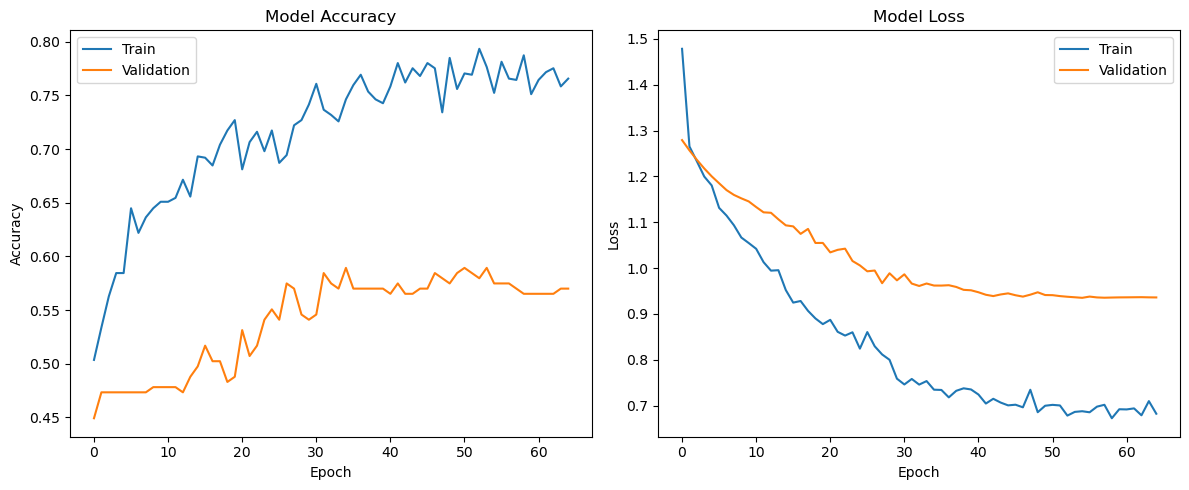

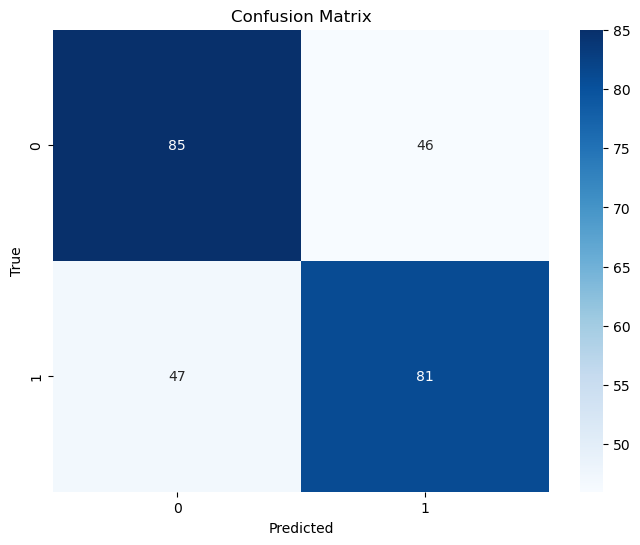

In [54]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
def load_data(data_dir):
    data = []
    labels = []
    for label in range(2):  # Only load classes 0 and 1
        class_dir = os.path.join(data_dir, f'class_{label}')
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if os.path.isfile(file_path) and file_path.endswith('.npy'):
                epoch_data = np.load(file_path)
                data.append(epoch_data)
                labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Define the path to the processed data
processed_data_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_finalvol2'
data, labels = load_data(processed_data_dir)

# Split data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)

# Data Augmentation (e.g., time-shifting)
def augment_data(data):
    augmented_data = []
    for epoch in data:
        shift = np.random.randint(epoch.shape[1] // 10)
        if np.random.rand() > 0.5:
            epoch = np.roll(epoch, shift, axis=1)
        else:
            epoch = np.roll(epoch, -shift, axis=1)
        augmented_data.append(epoch)
    return np.array(augmented_data)

train_data = augment_data(train_data)

# Define model hyperparameters
C = train_data.shape[1]  # Number of channels
T = train_data.shape[2]  # Number of samples
F1 = 32  # Number of temporal filters in EEGnet
F2 = 64  # Number of pointwise filters in EEGnet
D = 4  # Depth multiplier
KE = 64  # Kernel size in EEGnet first convolution
KT = 32  # Kernel size in TCN block
pe = 0.4  # Dropout rate in EEGnet
pt = 0.4  # Dropout rate in TCN block
FT = 32  # Filters in TCN block

# Define the model
def create_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # EEGNet Block
    x = tf.keras.layers.Conv2D(F1, (1, KE), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='C1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='BN1')(x)
    x = tf.keras.layers.DepthwiseConv2D((C, 1), depth_multiplier=D, padding='valid', depthwise_constraint=tf.keras.constraints.max_norm(1.), name='C2')(x)
    x = tf.keras.layers.BatchNormalization(name='BN2')(x)
    x = tf.keras.layers.ELU(name='A1')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P1')(x)
    x = tf.keras.layers.Dropout(pe, name='D1')(x)
    x = tf.keras.layers.SeparableConv2D(F2, (1, 16), padding='same', name='C3')(x)
    x = tf.keras.layers.BatchNormalization(name='B2')(x)
    x = tf.keras.layers.ELU(name='A2')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P2')(x)
    x = tf.keras.layers.Dropout(pe, name='D2')(x)

    # Temporal Convolutional Block
    tcn = tf.keras.layers.Conv2D(FT, (1, KT), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='TC')(x)
    tcn = tf.keras.layers.Dropout(pt)(tcn)
    tcn = tf.keras.layers.ELU()(tcn)

    # Concatenation
    x = tf.keras.layers.Concatenate(name='CON1')([x, tcn])

    # Fully Connected Layers
    fc1 = tf.keras.layers.Flatten(name='FC1')(x)
    x = tf.keras.layers.Dense(256, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_constraint=tf.keras.constraints.max_norm(0.25))(fc1)
    x = tf.keras.layers.Dropout(0.5)(x)  # Add another dropout layer
    outputs = tf.keras.layers.Dense(2, activation='softmax')(x)  # Change output layer to 2 classes

    model = tf.keras.Model(inputs, outputs)
    return model

# Initialize and compile the model
input_shape = (C, T, 1)
model = create_model(input_shape)
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights_array))

# Train the model
num_epochs = 200
batch_size = 32
history = model.fit(train_data, train_labels, epochs=num_epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[lr_scheduler, early_stopping],
                    class_weight=class_weights)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_labels, predicted_labels)
kappa_score = cohen_kappa_score(test_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')

print(f'Test Accuracy (calculated): {accuracy * 100:.2f}%')
print(f"Cohen's κ-score: {kappa_score:.2f}")
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print the number of parameters
num_params = model.count_params()
print(f'Number of parameters: {num_params}')

# Plot learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 501ms/step - accuracy: 0.4994 - loss: 1.9473 - val_accuracy: 0.5024 - val_loss: 1.2777 - learning_rate: 1.0000e-04
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 496ms/step - accuracy: 0.5610 - loss: 1.2532 - val_accuracy: 0.4734 - val_loss: 1.2559 - learning_rate: 1.0000e-04
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 499ms/step - accuracy: 0.5921 - loss: 1.2288 - val_accuracy: 0.4734 - val_loss: 1.2353 - learning_rate: 1.0000e-04
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 487ms/step - accuracy: 0.6377 - loss: 1.1764 - val_accuracy: 0.4734 - val_loss: 1.2170 - learning_rate: 1.0000e-04
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 480ms/step - accuracy: 0.6105 - loss: 1.1604 - val_accuracy: 0.4734 - val_loss: 1.1997 - learning_rate: 1.0000e-04
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 485ms/step - accuracy: 0.6256 - loss: 1.1447 - val_accuracy: 0.4734 - val_loss: 1.1829 - learning_rate: 1.0000e-04
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 506ms/ste

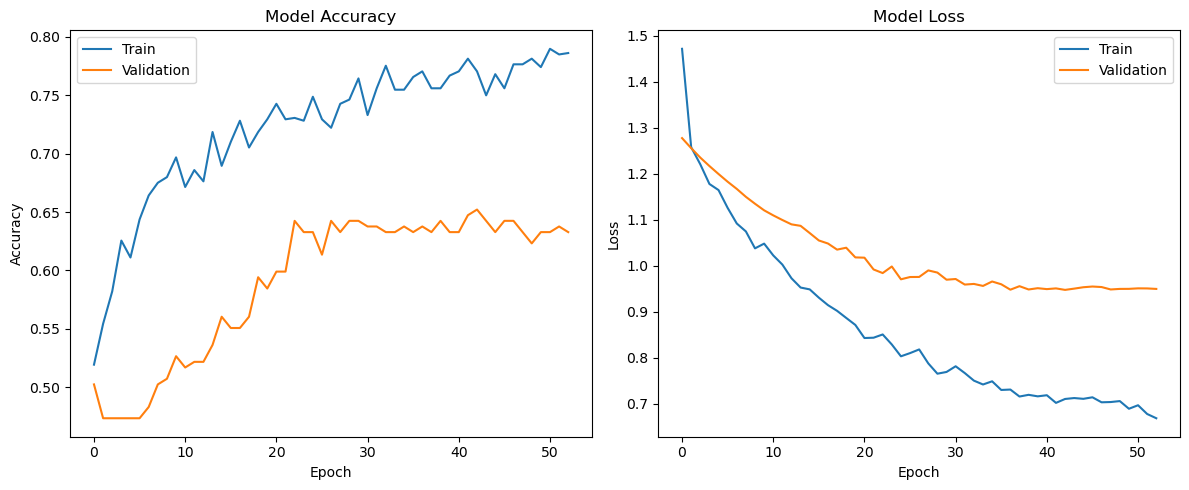

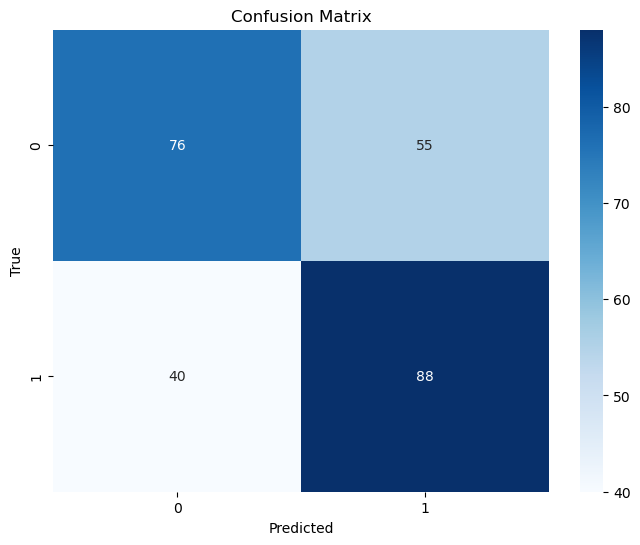

In [56]:
 import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
def load_data(data_dir):
    data = []
    labels = []
    for label in range(2):  # Only load classes 0 and 1
        class_dir = os.path.join(data_dir, f'class_{label}')
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if os.path.isfile(file_path) and file_path.endswith('.npy'):
                epoch_data = np.load(file_path)
                data.append(epoch_data)
                labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Define the path to the processed data
processed_data_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_finalvol2'
data, labels = load_data(processed_data_dir)

# Split data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)

# Define model hyperparameters
C = train_data.shape[1]  # Number of channels
T = train_data.shape[2]  # Number of samples
F1 = 32  # Number of temporal filters in EEGnet
F2 = 64  # Number of pointwise filters in EEGnet
D = 4  # Depth multiplier
KE = 64  # Kernel size in EEGnet first convolution
KT = 32  # Kernel size in TCN block
pe = 0.4  # Dropout rate in EEGnet
pt = 0.4  # Dropout rate in TCN block
FT = 32  # Filters in TCN block

# Define the model
def create_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # EEGNet Block
    x = tf.keras.layers.Conv2D(F1, (1, KE), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='C1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='BN1')(x)
    x = tf.keras.layers.DepthwiseConv2D((C, 1), depth_multiplier=D, padding='valid', depthwise_constraint=tf.keras.constraints.max_norm(1.), name='C2')(x)
    x = tf.keras.layers.BatchNormalization(name='BN2')(x)
    x = tf.keras.layers.ELU(name='A1')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P1')(x)
    x = tf.keras.layers.Dropout(pe, name='D1')(x)
    x = tf.keras.layers.SeparableConv2D(F2, (1, 16), padding='same', name='C3')(x)
    x = tf.keras.layers.BatchNormalization(name='B2')(x)
    x = tf.keras.layers.ELU(name='A2')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P2')(x)
    x = tf.keras.layers.Dropout(pe, name='D2')(x)

    # Temporal Convolutional Block
    tcn = tf.keras.layers.Conv2D(FT, (1, KT), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='TC')(x)
    tcn = tf.keras.layers.Dropout(pt)(tcn)
    tcn = tf.keras.layers.ELU()(tcn)

    # Concatenation
    x = tf.keras.layers.Concatenate(name='CON1')([x, tcn])

    # Fully Connected Layers
    fc1 = tf.keras.layers.Flatten(name='FC1')(x)
    x = tf.keras.layers.Dense(256, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_constraint=tf.keras.constraints.max_norm(0.25))(fc1)
    x = tf.keras.layers.Dropout(0.5)(x)  # Add another dropout layer
    outputs = tf.keras.layers.Dense(2, activation='softmax')(x)  # Change output layer to 2 classes

    model = tf.keras.Model(inputs, outputs)
    return model

# Initialize and compile the model
input_shape = (C, T, 1)
model = create_model(input_shape)
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights_array))

# Train the model
num_epochs = 200
batch_size = 32
history = model.fit(train_data, train_labels, epochs=num_epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[lr_scheduler, early_stopping],
                    class_weight=class_weights)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_labels, predicted_labels)
kappa_score = cohen_kappa_score(test_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')

print(f'Test Accuracy (calculated): {accuracy * 100:.2f}%')
print(f"Cohen's κ-score: {kappa_score:.2f}")
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print the number of parameters
num_params = model.count_params()
print(f'Number of parameters: {num_params}')

# Plot learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 488ms/step - accuracy: 0.4722 - loss: 1.9627 - val_accuracy: 0.4976 - val_loss: 1.2763 - learning_rate: 1.0000e-04
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 491ms/step - accuracy: 0.5683 - loss: 1.2581 - val_accuracy: 0.4734 - val_loss: 1.2555 - learning_rate: 1.0000e-04
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 481ms/step - accuracy: 0.5625 - loss: 1.2390 - val_accuracy: 0.4734 - val_loss: 1.2361 - learning_rate: 1.0000e-04
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 481ms/step - accuracy: 0.6453 - loss: 1.1817 - val_accuracy: 0.4734 - val_loss: 1.2196 - learning_rate: 1.0000e-04
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 481ms/step - accuracy: 0.6332 - loss: 1.1387 - val_accuracy: 0.4734 - val_loss: 1.2054 - learning_rate: 1.0000e-04
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 491ms/step - accuracy: 0.6316 - loss: 1.1221 - val_accuracy: 0.4734 - val_loss: 1.1911 - learning_rate: 1.0000e-04
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 491ms/ste

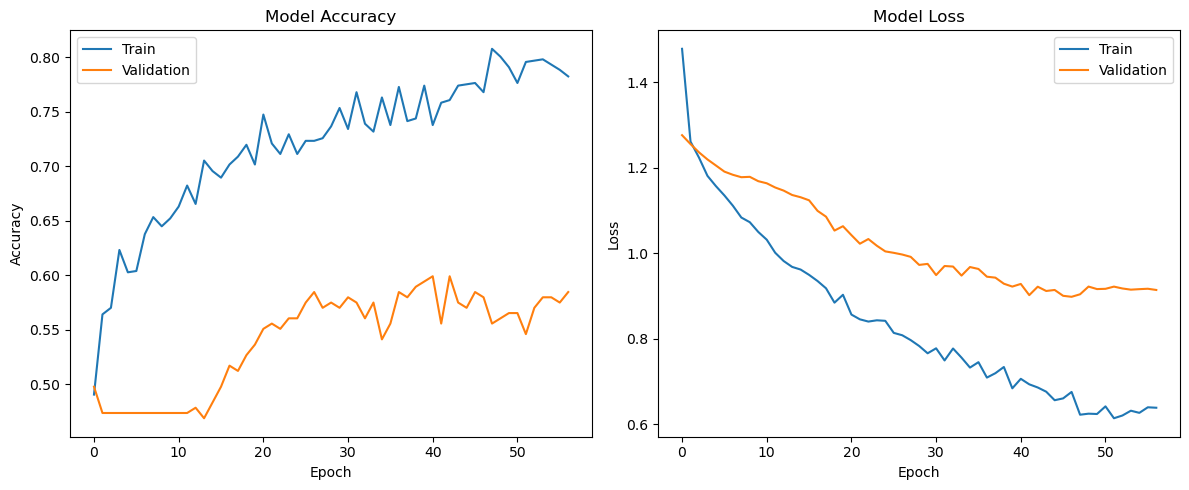

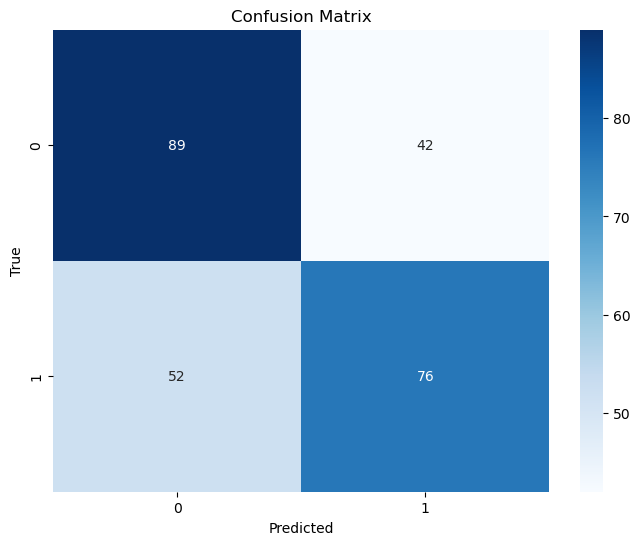

In [58]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
def load_data(data_dir):
    data = []
    labels = []
    for label in range(2):  # Only load classes 0 and 1
        class_dir = os.path.join(data_dir, f'class_{label}')
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if os.path.isfile(file_path) and file_path.endswith('.npy'):
                epoch_data = np.load(file_path)
                data.append(epoch_data)
                labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

# Define the path to the processed data
processed_data_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_finalvol2'
data, labels = load_data(processed_data_dir)

# Split data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)

# Data Augmentation (e.g., time-shifting)
def augment_data(data):
    augmented_data = []
    for epoch in data:
        shift = np.random.randint(epoch.shape[1] // 10)
        if np.random.rand() > 0.5:
            epoch = np.roll(epoch, shift, axis=1)
        else:
            epoch = np.roll(epoch, -shift, axis=1)
        # Add noise as another augmentation technique
        noise = np.random.normal(0, 0.1, epoch.shape)
        epoch += noise
        augmented_data.append(epoch)
    return np.array(augmented_data)

train_data = augment_data(train_data)

# Define model hyperparameters
C = train_data.shape[1]  # Number of channels
T = train_data.shape[2]  # Number of samples
F1 = 32  # Number of temporal filters in EEGnet
F2 = 64  # Number of pointwise filters in EEGnet
D = 4  # Depth multiplier
KE = 64  # Kernel size in EEGnet first convolution
KT = 32  # Kernel size in TCN block
pe = 0.4  # Dropout rate in EEGnet
pt = 0.4  # Dropout rate in TCN block
FT = 32  # Filters in TCN block

# Define the model
def create_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # EEGNet Block
    x = tf.keras.layers.Conv2D(F1, (1, KE), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='C1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='BN1')(x)
    x = tf.keras.layers.DepthwiseConv2D((C, 1), depth_multiplier=D, padding='valid', depthwise_constraint=tf.keras.constraints.max_norm(1.), name='C2')(x)
    x = tf.keras.layers.BatchNormalization(name='BN2')(x)
    x = tf.keras.layers.ELU(name='A1')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P1')(x)
    x = tf.keras.layers.Dropout(pe, name='D1')(x)
    x = tf.keras.layers.SeparableConv2D(F2, (1, 16), padding='same', name='C3')(x)
    x = tf.keras.layers.BatchNormalization(name='B2')(x)
    x = tf.keras.layers.ELU(name='A2')(x)
    x = tf.keras.layers.AveragePooling2D((1, 8), name='P2')(x)
    x = tf.keras.layers.Dropout(pe, name='D2')(x)

    # Temporal Convolutional Block
    tcn = tf.keras.layers.Conv2D(FT, (1, KT), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='TC')(x)
    tcn = tf.keras.layers.Dropout(pt)(tcn)
    tcn = tf.keras.layers.ELU()(tcn)

    # Concatenation
    x = tf.keras.layers.Concatenate(name='CON1')([x, tcn])

    # Fully Connected Layers
    fc1 = tf.keras.layers.Flatten(name='FC1')(x)
    x = tf.keras.layers.Dense(256, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01), kernel_constraint=tf.keras.constraints.max_norm(0.25))(fc1)
    x = tf.keras.layers.Dropout(0.5)(x)  # Add another dropout layer
    outputs = tf.keras.layers.Dense(2, activation='softmax')(x)  # Change output layer to 2 classes

    model = tf.keras.Model(inputs, outputs)
    return model

# Initialize and compile the model
input_shape = (C, T, 1)
model = create_model(input_shape)
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights_array))

# Train the model
num_epochs = 200
batch_size = 32
history = model.fit(train_data, train_labels, epochs=num_epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[lr_scheduler, early_stopping, model_checkpoint],
                    class_weight=class_weights)


# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_labels, predicted_labels)
kappa_score = cohen_kappa_score(test_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')

print(f'Test Accuracy (calculated): {accuracy * 100:.2f}%')
print(f"Cohen's κ-score: {kappa_score:.2f}")
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Print the number of parameters
num_params = model.count_params()
print(f'Number of parameters: {num_params}')

# Plot learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [67]:
import os
import re
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate
from tensorflow.keras.utils import to_categorical

# Function to load data from directories
def load_data(directory):
    data = []
    labels = []
    class_dirs = [os.path.join(directory, d) for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    
    for class_dir in class_dirs:
        match = re.search(r'class_(\d+)$', class_dir)  # Regex to match class_X pattern
        if match:
            class_label = int(match.group(1))
            files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
            
            for file in files:
                signal = np.load(file)  # Assuming the files are saved as .npy
                data.append(signal)
                labels.append(class_label)
    
    return np.array(data), np.array(labels)

# Step 1: Load Data
processed_data_dir = '/home/jovyan/BCICIV_2a_gdf/epoch_finalvol2'
data, labels = load_data(processed_data_dir)

# Step 2: Split Data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Reshape data to 2D form (assuming the data is originally (samples, channels, time))
# Here we consider each EEG channel as a separate 'feature' dimension, similar to image channels
train_data_2d = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2], 1))
test_data_2d = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2], 1))

# Convert labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Check the new shape
print("Shape of train_data_2d:", train_data_2d.shape)
print("Shape of test_data_2d:", test_data_2d.shape)

# Step 3: Build and Train CNN using multiple convolution kernels
def create_cnn_model(input_shape, num_classes):
    input_layer = Input(shape=input_shape)
    
    # First branch with 1x3 kernel
    branch_1 = Conv2D(32, kernel_size=(1, 3), activation='relu')(input_layer)
    branch_1 = MaxPooling2D(pool_size=(1, 2))(branch_1)
    branch_1 = Flatten()(branch_1)
    
    # Second branch with 1x5 kernel
    branch_2 = Conv2D(32, kernel_size=(1, 5), activation='relu')(input_layer)
    branch_2 = MaxPooling2D(pool_size=(1, 2))(branch_2)
    branch_2 = Flatten()(branch_2)
    
    # Third branch with 1x11 kernel
    branch_3 = Conv2D(32, kernel_size=(1, 11), activation='relu')(input_layer)
    branch_3 = MaxPooling2D(pool_size=(1, 2))(branch_3)
    branch_3 = Flatten()(branch_3)
    
    # Concatenate branches
    concatenated = Concatenate()([branch_1, branch_2, branch_3])
    
    # Fully connected layers
    fc = Dense(128, activation='relu')(concatenated)
    output_layer = Dense(num_classes, activation='softmax')(fc)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

input_shape = train_data_2d.shape[1:]  # Should be (channels, time, 1)
num_classes = train_labels.shape[1]

cnn_model = create_cnn_model(input_shape, num_classes)

# Train the model
cnn_model.fit(train_data_2d, train_labels, epochs=1000, batch_size=32, validation_data=(test_data_2d, test_labels))

# Evaluate the model
loss, accuracy = cnn_model.evaluate(test_data_2d, test_labels)
print(f"Test accuracy: {accuracy * 100:.2f}%")


Shape of train_data_2d: (2066, 22, 1126, 1)
Shape of test_data_2d: (517, 22, 1126, 1)
Epoch 1/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.2438 - loss: 48.9799 - val_accuracy: 0.2650 - val_loss: 1.3848
Epoch 2/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.2587 - loss: 1.3727 - val_accuracy: 0.2456 - val_loss: 1.4410
Epoch 3/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.3184 - loss: 1.3390 - val_accuracy: 0.2456 - val_loss: 1.4011
Epoch 4/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.3353 - loss: 1.3049 - val_accuracy: 0.2689 - val_loss: 1.5341
Epoch 5/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.3773 - loss: 1.2637 - val_accuracy: 0.2631 - val_loss: 1.5750
Epoch 6/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4055 - loss: 1.1889 - val_accuracy: 0.2669 - val_loss: 1.5392
Epoch 7/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.3955 - loss: 1.2057 - val_accuracy: 0.2592 - val_loss: 1.6284
Epoch 8/1000
65/6

KeyboardInterrupt: 